# Project : Deepfake Image Detection

This project explores the efficacy of Convolutional Neural Networks (CNN) in the detection of deepfake images

### Group Members
- AFIS LONGE (Git Management, UI, Model, Integrations)
- GANESHAROW BAPPOO (Feature Engineering, Documentation, Notebook)
- JUAN SEBASTIAN RODRIGUEZ REYES (Model Buiding, UI)
- KHESHINI BUDHNA (Transfer Learning)
- MEENU SHARMA (Model Building)
- MIGUEL ANGEL MARTINEZ GONZALEZ (Feature Engineering)
- NORMA PARRA (Model Building, Database, UI)

### Note: All members contributed equally to this project, numerous research work were done before building the models.

Git Repo: https://github.com/afislonge/deepfake-detection-project

---------

# Mid Submision Notebook

**A few things to note:**

- You'll need to install the various libraries before importing them ```(i.e. %pip install pandas)```
- You may need to restart the kernel to use updated packages.

### Dependancies

- TensorFlow/Keras: Core libraries for deep learning, which include the pre-trained VGG19 and Xception models.
- OpenCV (cv2): Provides image processing capabilities and supports deep learning frameworks for tasks like object detection.
- MTCNN: Specialized for accurate face detection, particularly useful if your deepfake detection focuses on facial features.
- Pillow (PIL): Useful for image manipulation tasks such as resizing, cropping, and format conversions.
- Matplotlib: For plotting graphs and visualizing the images or the results of the model's performance.
- Seaborn: For more advanced statistical visualizations, built on top of Matplotlib.
- Scikit-learn: Offers various tools for model evaluation and selection, such as splitting datasets, cross-validation, and metrics computation.
- Numpy: Essential for numerical computations and handling arrays, particularly for manipulating image data.
- Pandas: While not typically needed for image data, it's useful for dataset manipulation and analysis if you're also working with structured data.
- Dlib: Another machine learning toolkit known for its robust facial detection and recognition algorithms.

# 1.0 Git Repository Walkthrough



### 1.1 Repository Structure
The repository is structured into several main directories: `data` for datasets, `src` for source code, `notebooks` for Jupyter notebooks, `models` for saved model checkpoints, and `docs` for documentation. Key files include `train.py` for training models, `evaluate.py` for evaluation, and `requirements.txt` for dependencies.
Version Control
We adopted a feature-branch workflow, ensuring that new features were developed in isolation before merging into the main branch. Commit messages were kept concise yet descriptive, following a convention that includes the type of change and the feature affected.

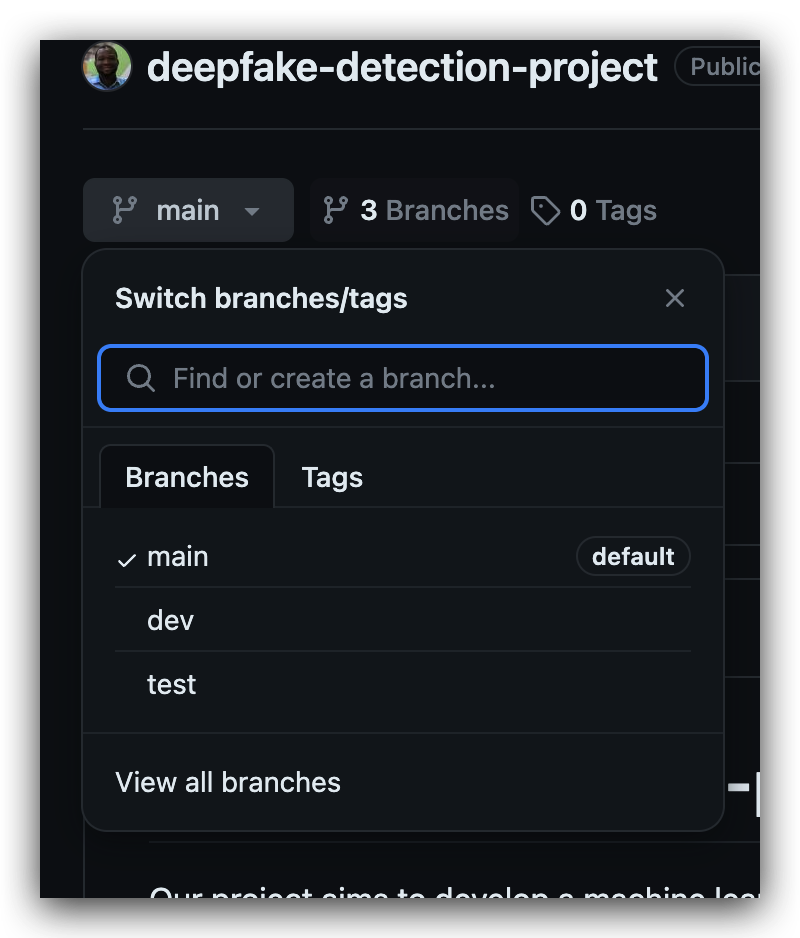

### 1.2 Version Control
We adopted a feature-branch workflow, ensuring that new features were developed in isolation before merging into the main branch. Commit messages were kept concise yet descriptive, following a convention that includes the type of change and the feature affected.


### 1.3 Code Quality
Our code quality protocol used a dedicated development branch for incremental change (from version control), distinct from the main branch. Commits to this branch mandated detailed comments to elucidate the code's purpose. This process, coupled with mandatory peer reviews for pull requests, ensured that all contributions were well-documented and scrutinized for clarity before being merged into the main branch, fostering a robust and transparent, and quality driven development environment.

### 1.4 Collaboration
Collaboration was facilitated using GitHub Issues to track tasks and Pull Requests for code review, ensuring that code met quality standards before integration.

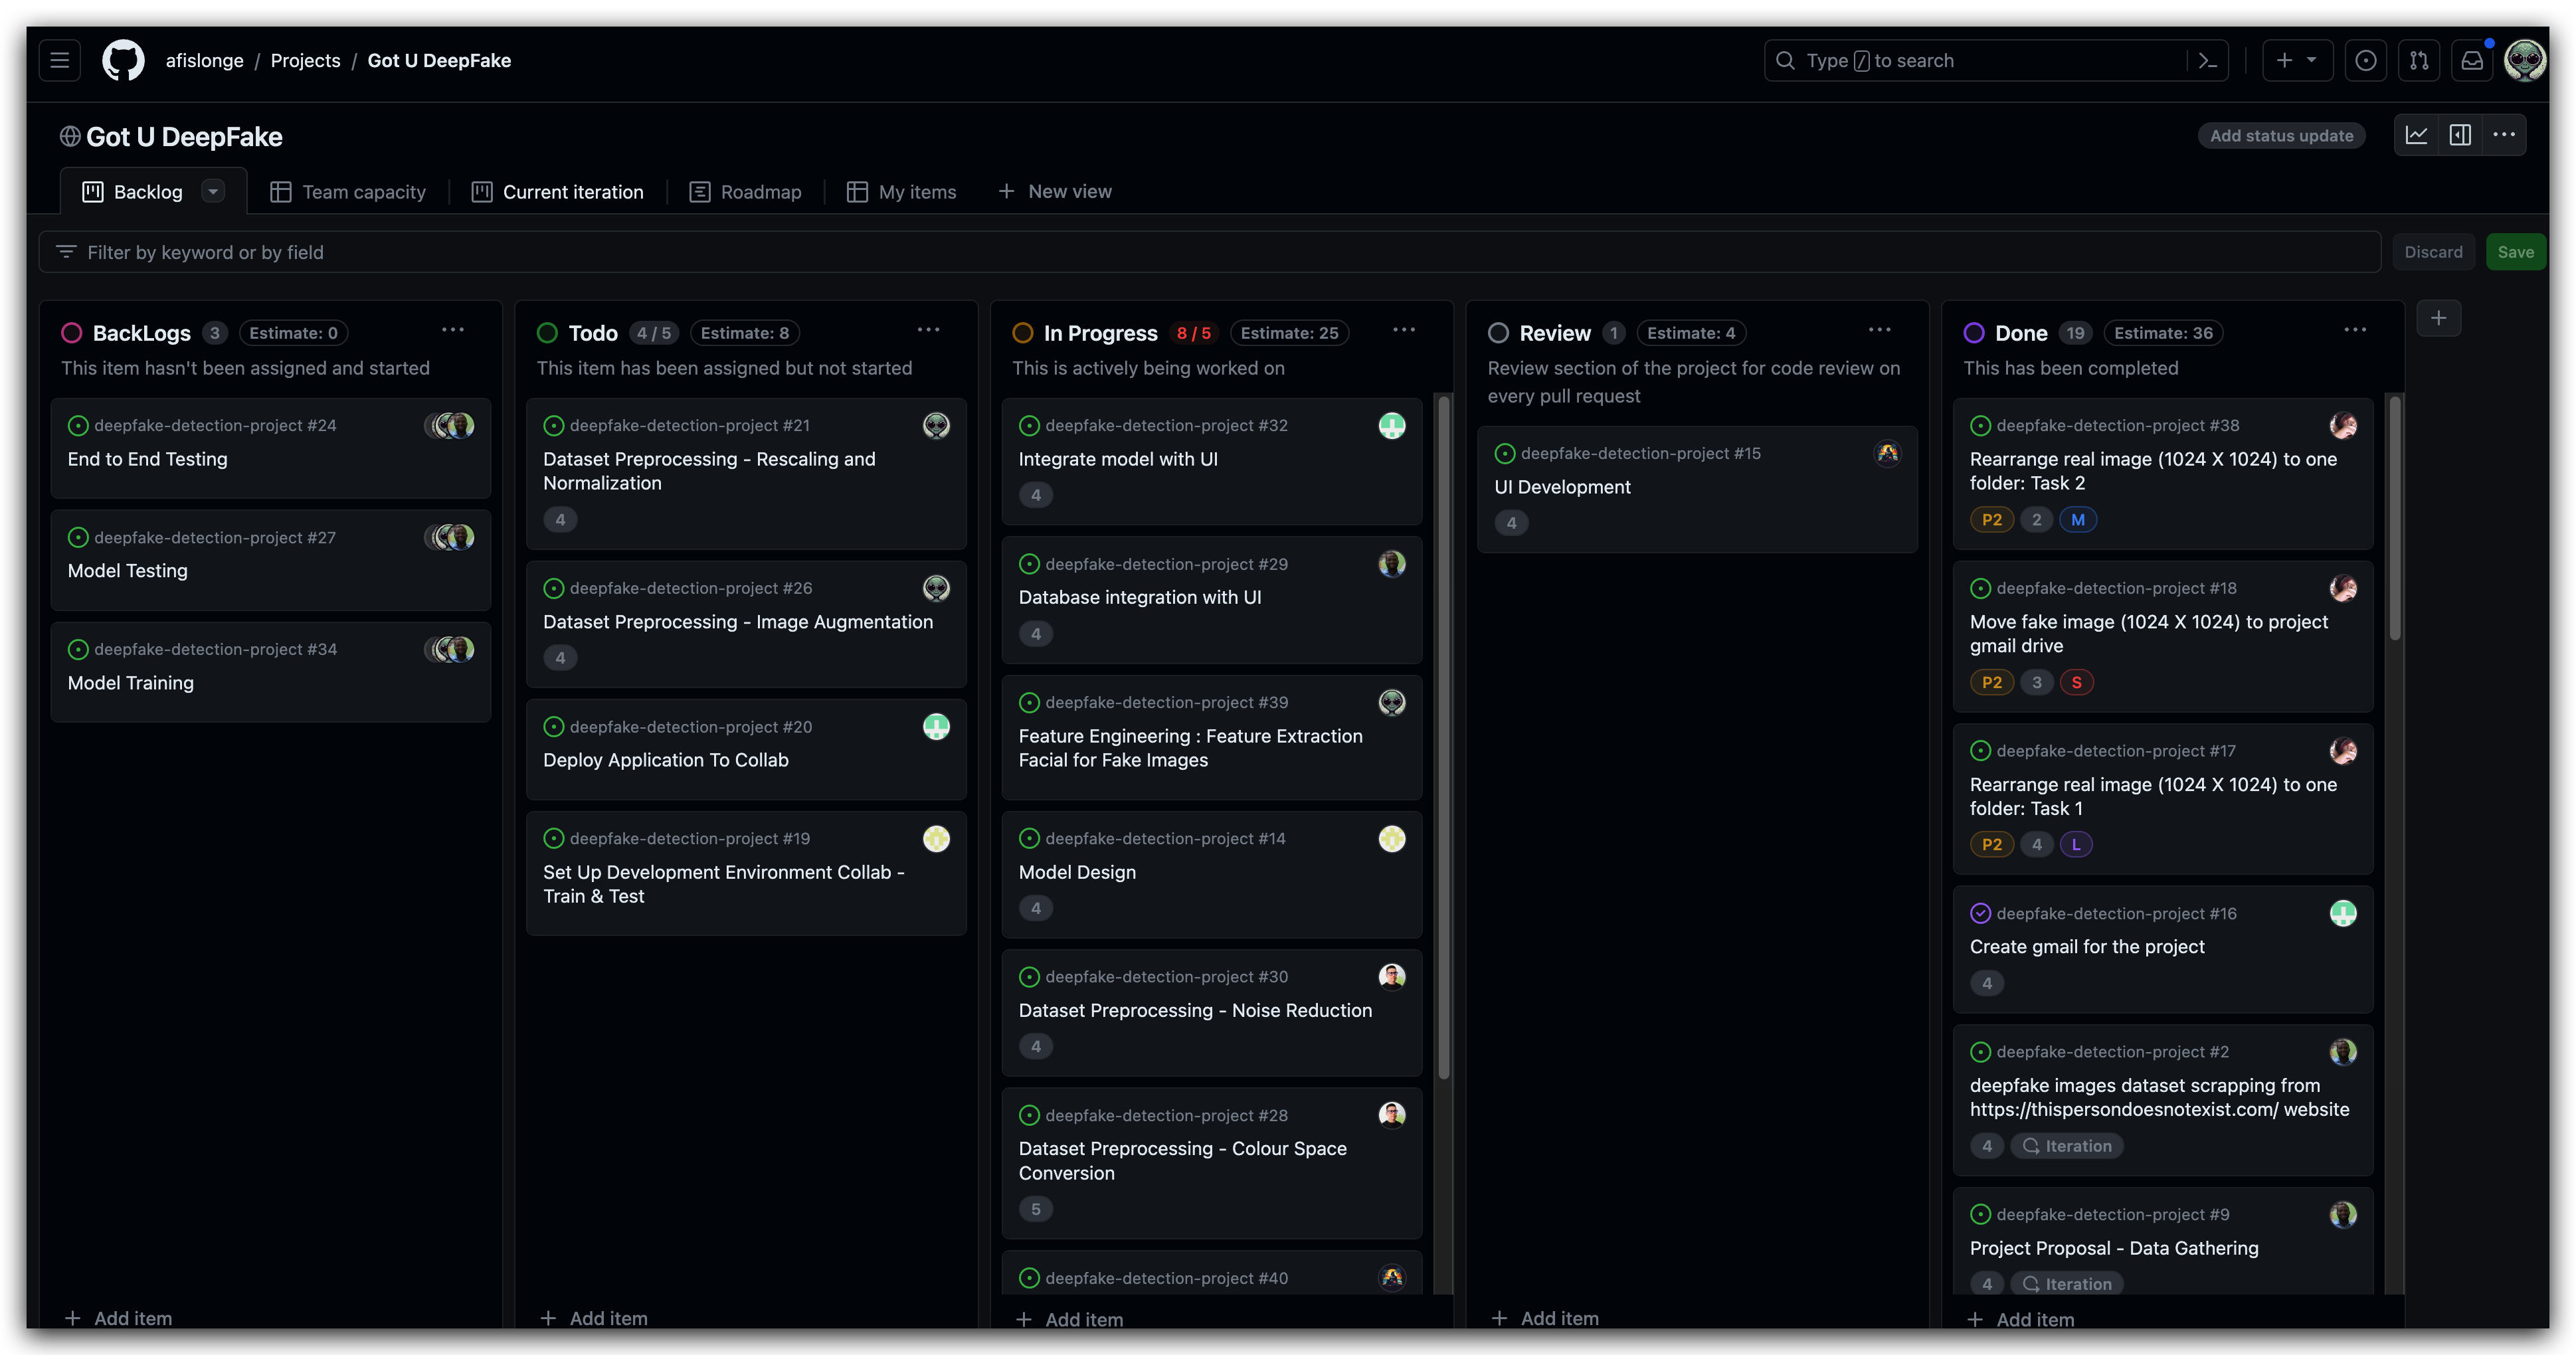

--------

# Exploring our Datasets

## Real Images from Flikr

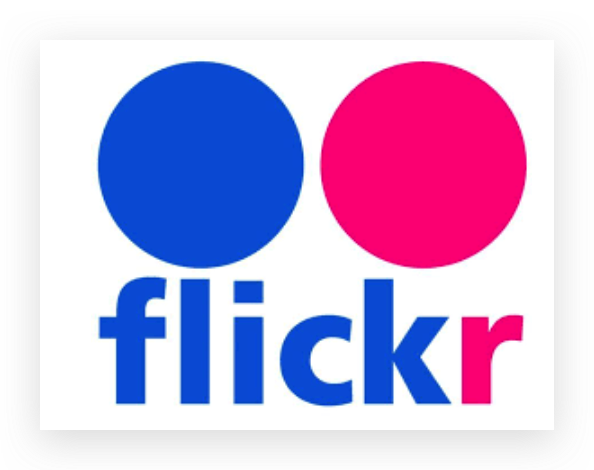

The dataset, comprising 70,000 high-quality PNG images at a resolution of 1024×1024, showcases a diverse array of age groups, ethnicities, and backgrounds. It includes a wide range of accessories like eyeglasses and hats, sourced from Flickr, hence mirroring its inherent biases. Images have been aligned and cropped with dlib, with careful selection to include only permissively licensed content. Automatic filters and Amazon Mechanical Turk further refined the dataset, eliminating non-human images such as statues and paintings.

### License for use

License:
The individual images were published in Flickr by their respective authors under either Creative Commons BY 2.0, Creative Commons BY-NC 2.0, Public Domain Mark 1.0, Public Domain CC0 1.0, or U.S. Government Works license. All of these licenses allow free use, redistribution, and adaptation for non-commercial purposes. However, some of them require giving appropriate credit to the original author, as well as indicating any changes that were made to the images. The license and original author of each image are indicated in the metadata.

https://creativecommons.org/licenses/by/2.0/
https://creativecommons.org/licenses/by-nc/2.0/
https://creativecommons.org/publicdomain/mark/1.0/
https://creativecommons.org/publicdomain/zero/1.0/
http://www.usa.gov/copyright.shtml
The dataset itself (including JSON metadata, download script, and documentation) is made available under Creative Commons BY-NC-SA 4.0 license by NVIDIA Corporation. You can use, redistribute, and adapt it for non-commercial purposes, as long as you (a) give appropriate credit by citing our paper, (b) indicate any changes that you've made, and (c) distribute any derivative works under the same license.

https://creativecommons.org/licenses/by-nc-sa/4.0/

-----

## Deepfake Images from thispersondoesnotexist.com

The site, developed by Philip Wang of Uber, leverages Nvidia's StyleGAN, a variant of generative adversarial networks (GANs) conceived by Ian Goodfellow. StyleGAN synthesizes realistic portraits by training on vast real-image datasets, showcasing its flexibility and advanced image generation capabilities. Wang emphasizes the potential underestimation of AI's future prowess in image synthesis, with StyleGAN enabling the creation of endless unique facial images, demonstrating significant advancements in AI-driven image manipulation

Generative Adversarial Networks (GANs), such as Nvidia's StyleGAN, operate on a dual-network architecture, consisting of a generator and a discriminator, that collaborates in a competitive manner to produce highly realistic images. The generator creates images from random noise, aiming to mimic the distribution of a training dataset composed of genuine images. Concurrently, the discriminator evaluates these images against the real ones, learning to distinguish between the two. Through iterative training, the generator improves its ability to produce increasingly convincing images, while the discriminator becomes better at identifying fakes. This process culminates in the generation of new, unique images that closely resemble real human portraits, showcasing the GAN's ability to learn and replicate complex image patterns and textures found in the training data.

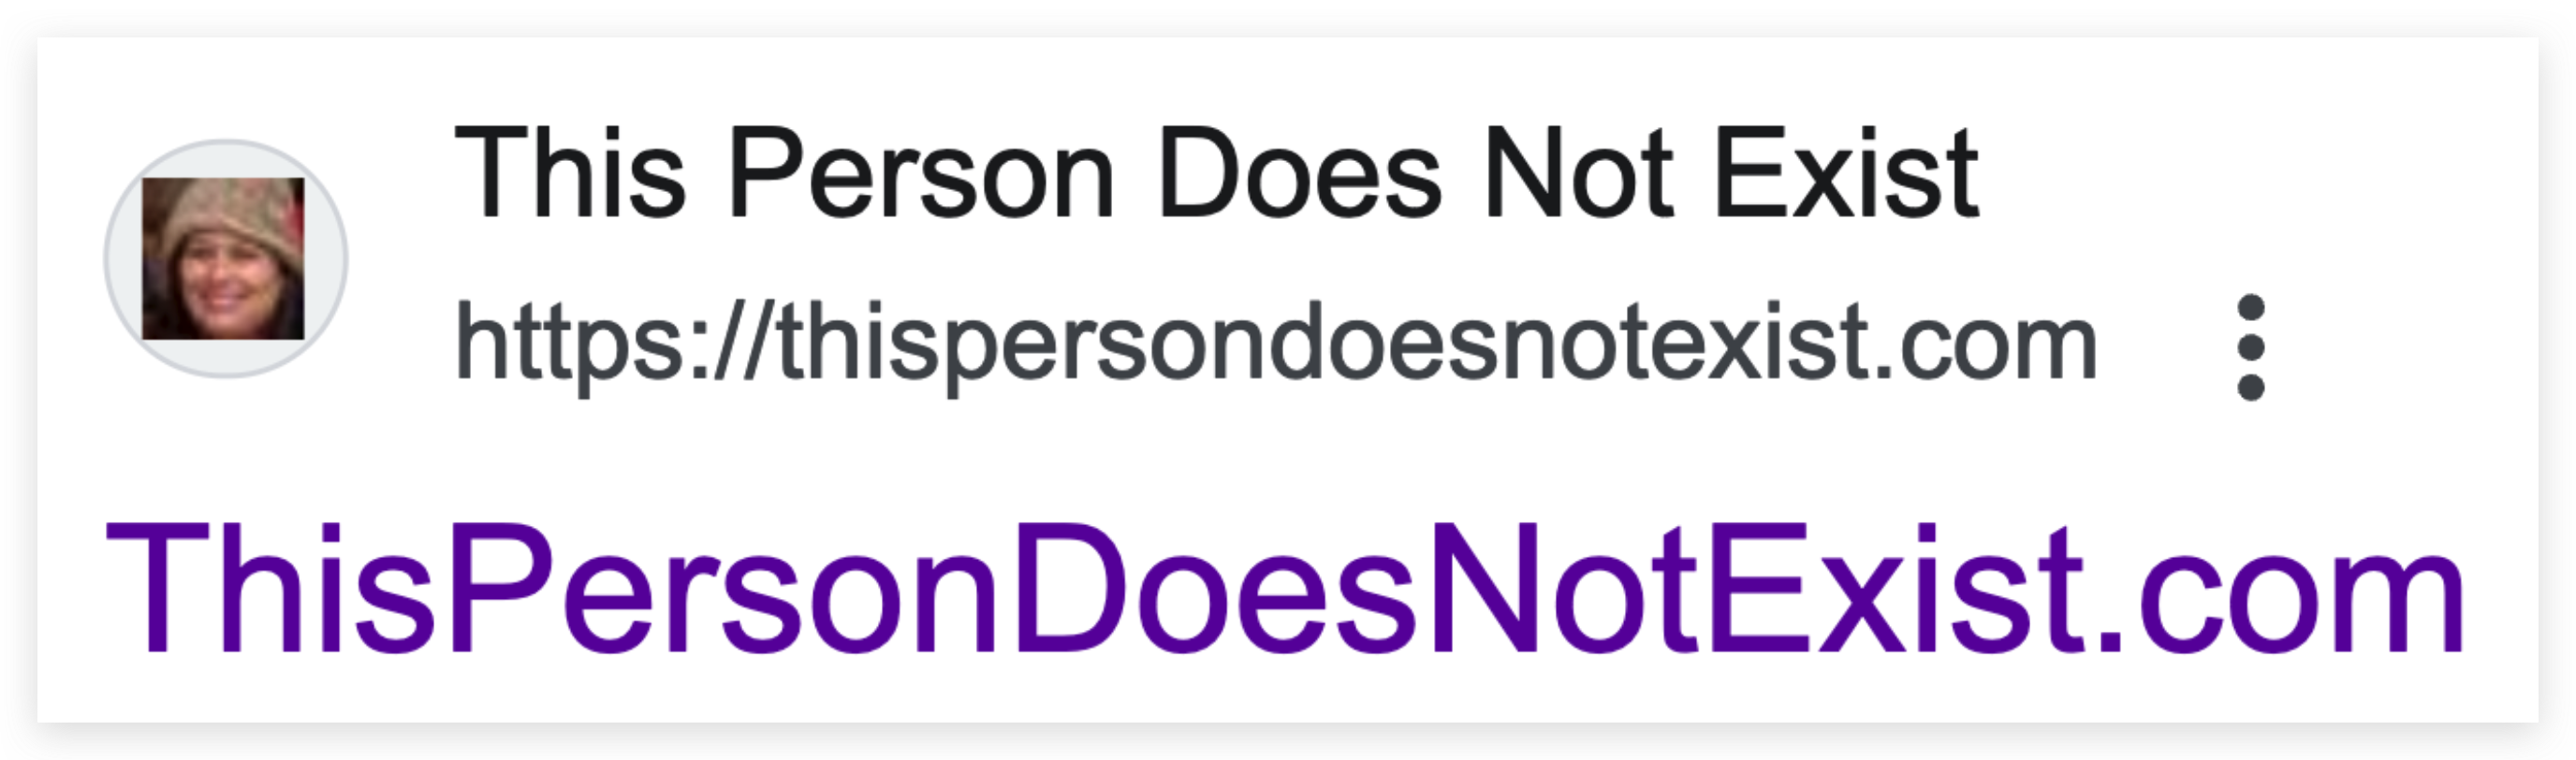

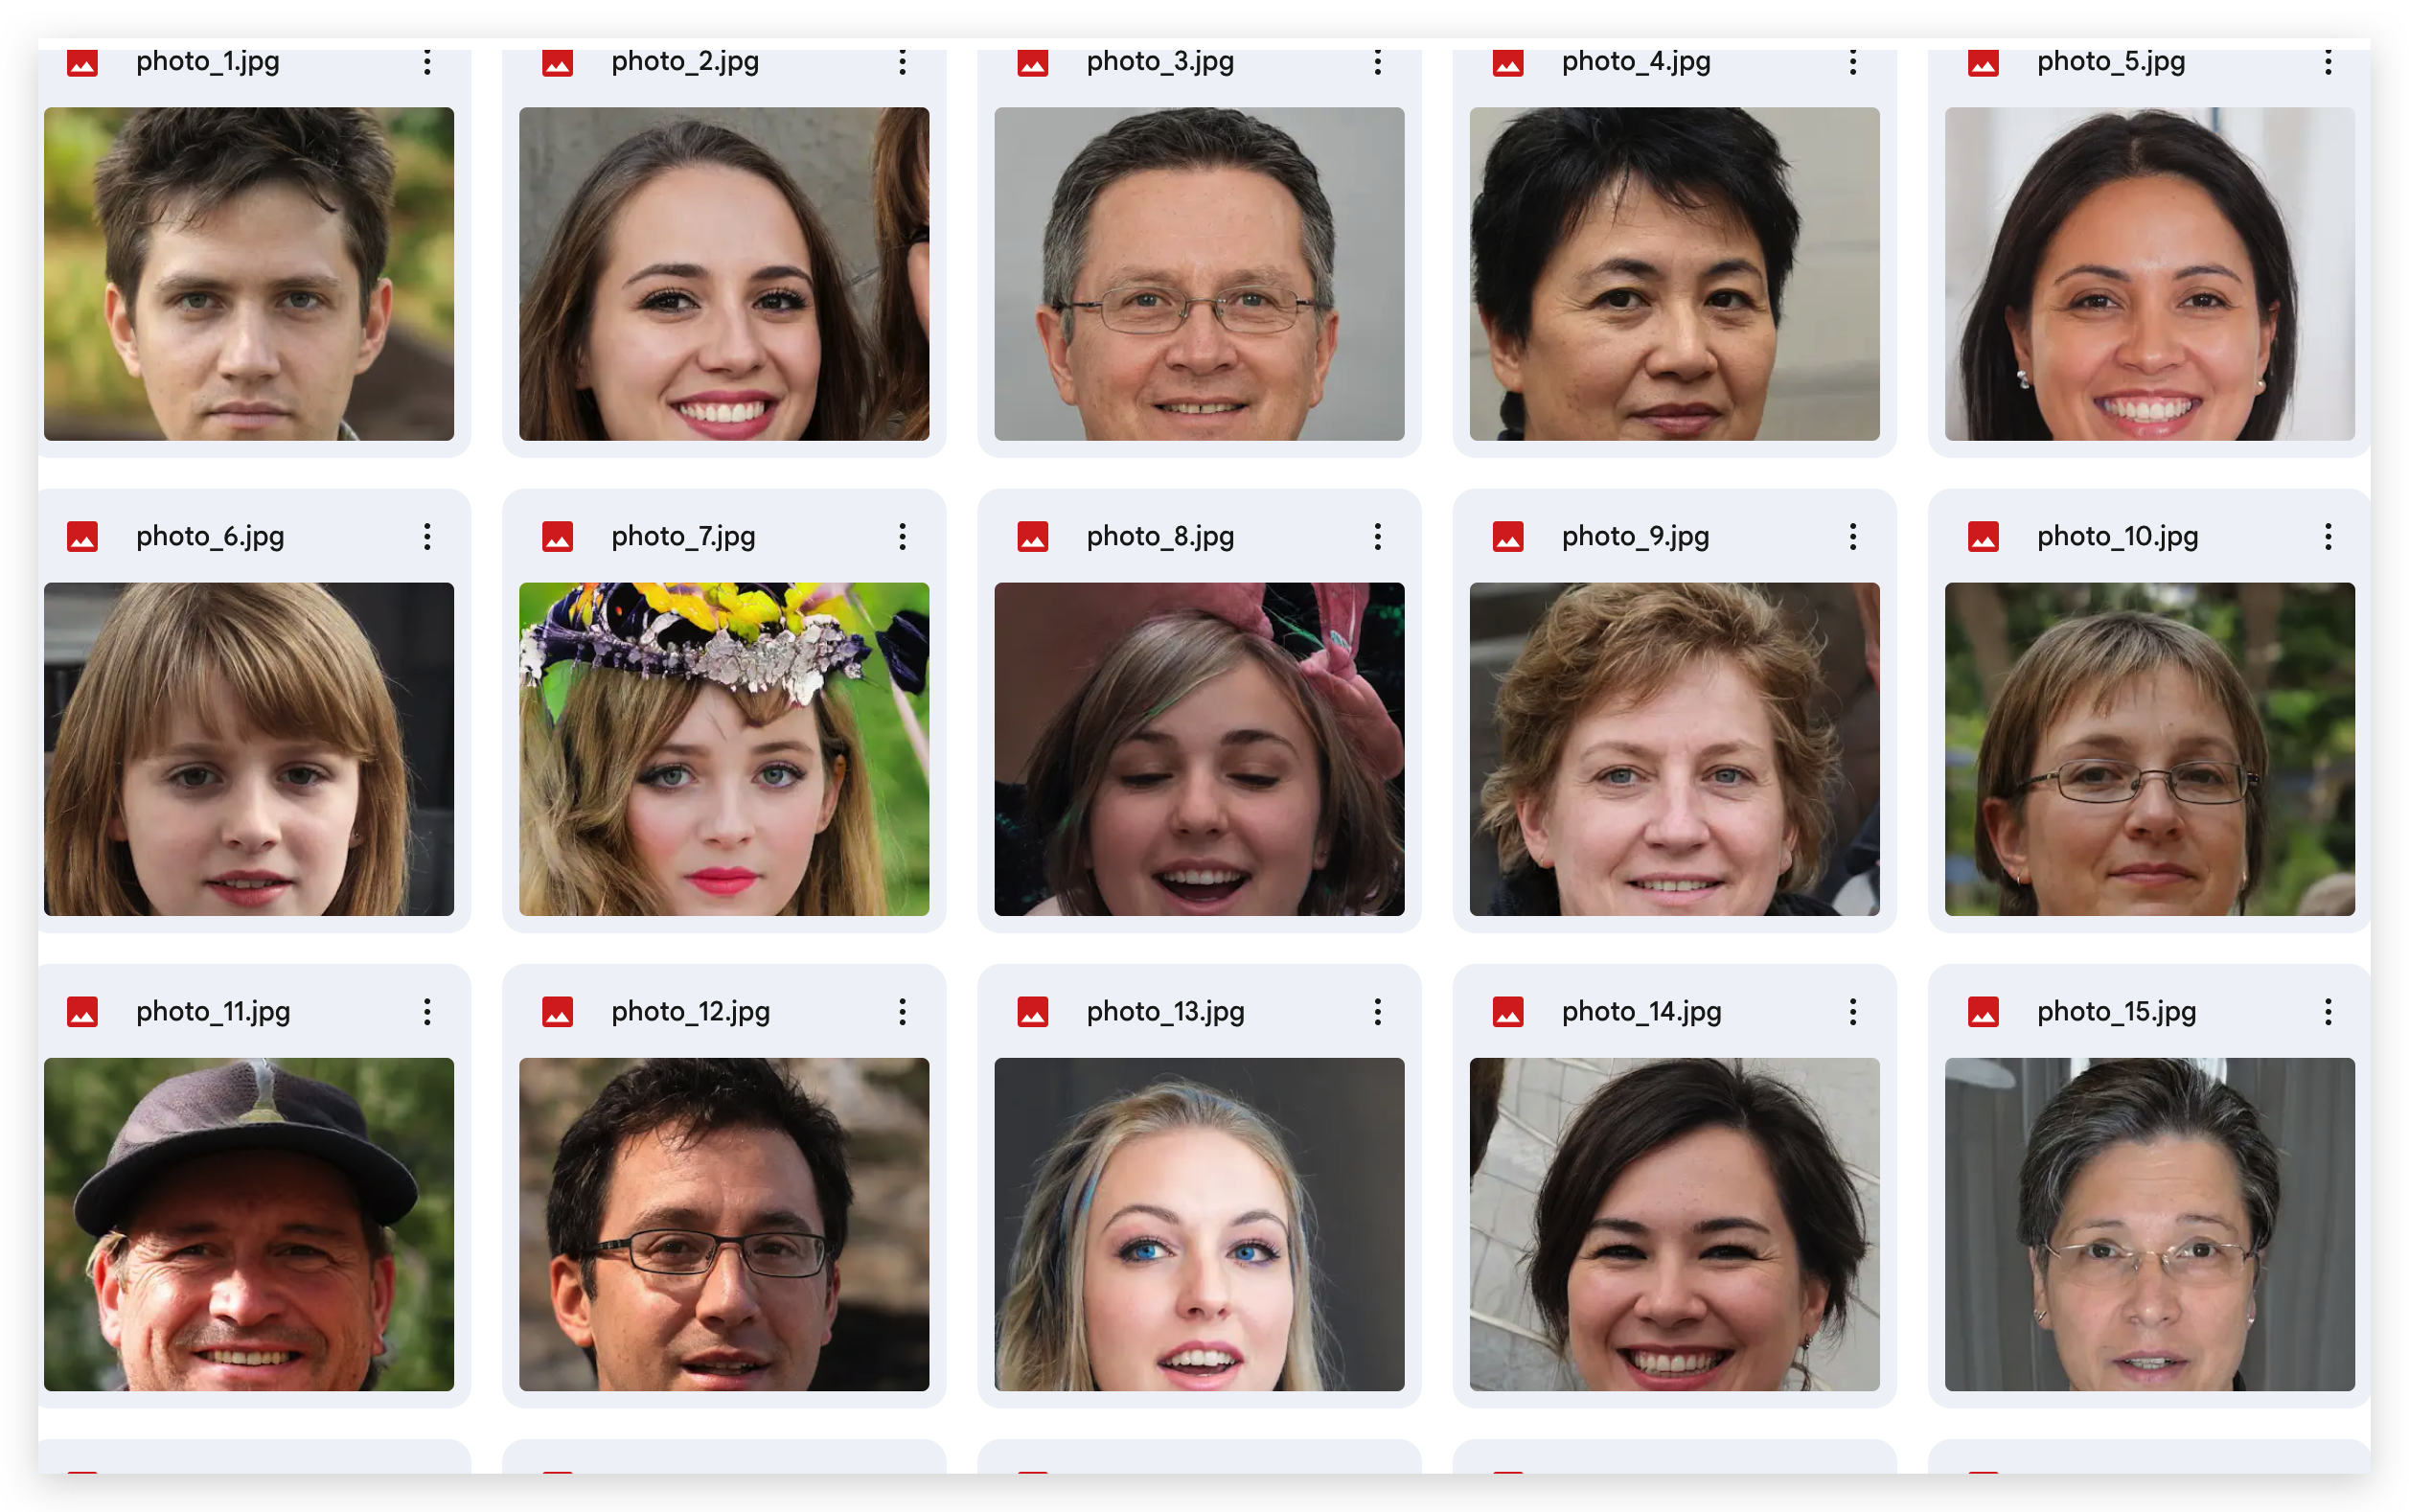

----------

# 2.0 Data Preprocessing and Feature Engineering

### Image-derived feature variables

- Pixel Intensity Features: The fundamental values from image pixels across RGB channels.

- Texture and Pattern Features: Quantified visual patterns using techniques like Gabor filters or Local Binary Patterns (LBP), and inherent features learned by CNNs.

- Shape and Contour Features: Distinctive outlines or irregularities that might signal manipulation.

- Frequency Domain Features: Attributes found through Fourier Transform, highlighting anomalies not visible in the spatial domain.

- CNN-based Features: Advanced representations derived from pre-trained CNN models, capturing complex patterns within the images, crucial for distinguishing between real and fake content.

### Target variable

Authenticity Label:
This binary variable indicates the nature of the image.
- 0 represent a real, unaltered image.
- 1 indicate a fake or manipulated image (deepfake).
The primary task of the deepfake detection model is to predict this label accurately for any given input image.

In [2]:
# Import necessary libraries for data handling, machine learning models, and visualization.
import numpy as np
import os
from google.colab import drive  # For accessing files on Google Drive
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.metrics import accuracy_score  # For evaluating model performance
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced plotting
from tensorflow.keras.applications.xception import Xception, preprocess_input  # Pre-trained model and preprocessing
from tensorflow.keras.preprocessing.image import img_to_array, load_img  # For image loading and processing
from sklearn.pipeline import Pipeline  # For creating model pipelines
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.decomposition import PCA  # For dimensionality reduction
from sklearn.ensemble import RandomForestClassifier  # Classifier 1
from xgboost import XGBClassifier  # Classifier 2
from sklearn.linear_model import LogisticRegression  # Classifier 3
from sklearn.base import TransformerMixin, BaseEstimator  # Base classes for custom transformer


In [3]:
# Mount your Google Drive to access the dataset stored there.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

In [5]:
#  dataset directories on Google Drive
real_images_dir = '/content/drive/MyDrive/Original_Images/real'
fake_images_dir = '/content/drive/MyDrive/Original_Images/fake'

## Feature Extraction - Capturing Fearture From Fake and Real Images

The code imports libraries and defines functions to extract features like Gabor filters, Local Binary Patterns (LBP), Fourier Transform, and CNN-based features from images. Real and fake images are loaded and features are extracted, followed by plotting histograms to compare feature distributions between real and fake images. This process aids in understanding the differences or similarities in image features, crucial for deepfake detection.

The features dataset comprises features from images, aimed at distinguishing fake from real ones through Gabor filters, Local Binary Patterns (LBP), and Fourier transforms. Gabor filters capture texture by analyzing spatial patterns. LBP, a texture descriptor, compares each pixel to its neighbors to create a histogram reflecting the image's texture. Fourier transforms shift the image from the spatial to the frequency domain, highlighting repetitive patterns. Each row represents an image, with these features indicating its texture and frequency characteristics. The 'Label' column categorizes images as 'Real' or 'Fake', serving as the basis for training models to differentiate between authentic and manipulated images.

### Note This part of the code doestnt need to be run, features were saved in a csv for repeated usage and easier acesss

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.feature import local_binary_pattern
from sklearn.preprocessing import StandardScaler
import os

# Function to extract features using Gabor filters
def extract_gabor_features(img):
    # Define Gabor filter parameters
    ksize = 31
    sigma = 3
    theta = np.pi / 4
    lambd = np.pi / 2
    gamma = 0.5
    # Apply Gabor filter
    gabor = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, 0, ktype=cv2.CV_32F)
    img_filtered = cv2.filter2D(img, cv2.CV_8UC3, gabor)
    return img_filtered.flatten()

# Function to extract features using Local Binary Patterns (LBP)
def extract_lbp_features(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Compute LBP features
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    return hist

# Function to extract features using Fourier Transform
def extract_fourier_features(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Compute Fourier Transform
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift) + 1)
    return magnitude_spectrum.flatten()

# Function to extract CNN-based features (In Development)
def extract_cnn_features(img):
    # Your code to extract CNN-based features goes here
    pass

# Load and preprocess images
real_images_dir = '/content/drive/MyDrive/Original_Images/real'
fake_images_dir = '/content/drive/MyDrive/Original_Images/fake'
real_images = [cv2.imread(os.path.join(real_images_dir, filename)) for filename in os.listdir(real_images_dir)[:50]]
fake_images = [cv2.imread(os.path.join(fake_images_dir, filename)) for filename in os.listdir(fake_images_dir)[:50]]

# Extract features for real images
real_gabor_features = [extract_gabor_features(img) for img in real_images]
real_lbp_features = [extract_lbp_features(img) for img in real_images]
real_fourier_features = [extract_fourier_features(img) for img in real_images]
real_cnn_features = [extract_cnn_features(img) for img in real_images]

# Extract features for fake images
fake_gabor_features = [extract_gabor_features(img) for img in fake_images]
fake_lbp_features = [extract_lbp_features(img) for img in fake_images]
fake_fourier_features = [extract_fourier_features(img) for img in fake_images]
fake_cnn_features = [extract_cnn_features(img) for img in fake_images]

# Plot histograms of the extracted features
plt.figure(figsize=(15, 10))

# Plot Gabor features
plt.subplot(2, 4, 1)
plt.hist(np.array(real_gabor_features).flatten(), bins=50, alpha=0.5, label='Real')
plt.hist(np.array(fake_gabor_features).flatten(), bins=50, alpha=0.5, label='Fake')
plt.title('Gabor Features')
plt.legend()

# Plot LBP features
plt.subplot(2, 4, 2)
plt.hist(np.array(real_lbp_features).flatten(), bins=50, alpha=0.5, label='Real')
plt.hist(np.array(fake_lbp_features).flatten(), bins=50, alpha=0.5, label='Fake')
plt.title('LBP Features')
plt.legend()

# Plot Fourier features
plt.subplot(2, 4, 3)
plt.hist(np.array(real_fourier_features).flatten(), bins=50, alpha=0.5, label='Real')
plt.hist(np.array(fake_fourier_features).flatten(), bins=50, alpha=0.5, label='Fake')
plt.title('Fourier Features')
plt.legend()

# Plot CNN features
plt.subplot(2, 4, 4)
# Plot CNN features here
plt.title('CNN Features')

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Create DataFrame for real images
real_df = pd.DataFrame({
    'Gabor': real_gabor_features,
    'LBP': real_lbp_features,
    'Fourier': real_fourier_features,
    'CNN': real_cnn_features,
    'Label': ['Real'] * len(real_images)
})

import pandas as pd

# Create DataFrame for real images without the CNN column
real_df = pd.DataFrame({
    'Gabor': real_gabor_features,
    'LBP': real_lbp_features,
    'Fourier': real_fourier_features,
    'Label': ['Real'] * len(real_images)
})

# Create DataFrame for fake images without the CNN column
fake_df = pd.DataFrame({
    'Gabor': fake_gabor_features,
    'LBP': fake_lbp_features,
    'Fourier': fake_fourier_features,
    'Label': ['Fake'] * len(fake_images)
})

# Concatenate real and fake DataFrames
combined_df = pd.concat([real_df, fake_df], ignore_index=True)


In [ ]:
combined_df.head()

In [ ]:
# Save the DataFrame to a CSV file
combined_df.to_csv('combined_data.csv', index=False)

## Start here to manipulate features, it comes from the features csv

In [43]:
import pandas as pd

# Read the CSV file into a DataFrame
features_df = pd.read_csv('combined_data.csv')


In [44]:
features_df.head()

Gabor                                                LBP  \
0        [0 0 2 ... 0 0 0]  [ 38590  17452  16004  16162  14640  14593  13...   
1        [0 1 1 ... 2 0 0]  [ 27717  19182  16190  12615  10054   9549   9...   
2        [0 0 0 ... 2 4 0]  [ 43998  20072  22899  21472  17556  15683  14...   
3        [2 1 3 ... 0 0 0]  [ 42346  20237  20577  15790  10746   9173   8...   
4  [ 3  3  4 ... 11 16 12]  [ 48878  24621  21221  15990  11573   9890   8...   

                                             Fourier Label  
0  [3.25809654 5.64685757 5.19286972 ... 5.488865...  Real  
1  [5.62762111 4.47829781 5.63397016 ... 5.956344...  Real  
2  [5.1590553  5.82844268 4.97918987 ... 6.133148...  Real  
3  [5.97126184 6.50889131 6.400574   ... 6.086294...  Real  
4  [4.57471098 5.69027917 4.50424943 ... 5.684512...  Real

In [45]:
from google.colab import files

# Save the DataFrame to a CSV file
combined_df.to_csv('combined_data.csv', index=False)

# Download the CSV file
files.download('combined_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
features_df.describe()

Gabor                                                LBP  \
count                 100                                                100   
unique                 62                                                100   
top     [0 0 0 ... 0 0 0]  [ 38590  17452  16004  16162  14640  14593  13...   
freq                   35                                                  1   

                                                  Fourier Label  
count                                                 100   100  
unique                                                100     2  
top     [3.25809654 5.64685757 5.19286972 ... 5.488865...  Real  
freq                                                    1    50

In [47]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Gabor    100 non-null    object
 1   LBP      100 non-null    object
 2   Fourier  100 non-null    object
 3   Label    100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [ ]:
#mport numpy as np
#import ast

# Function to convert string representation of lists into actual numerical arrays
#def string_to_array(feature_string):
#    try:
        # Safely evaluate string to list
#        feature_array = np.array(ast.literal_eval(feature_string))
        return feature_array
    except (ValueError, SyntaxError):
        # In case of any error, return a NaN array or handle appropriately
        return np.nan

# Apply this conversion to each of the feature columns
#data['Gabor_Num'] = data['Gabor'].apply(string_to_array)
#data['LBP_Num'] = data['LBP'].apply(string_to_array)
#data['Fourier_Num'] = data['Fourier'].apply(string_to_array)


In [49]:
import re
import pandas as pd

# Read the CSV file into a DataFrame
features_df = pd.read_csv('combined_data.csv')

# Define a function to extract numeric values from the string representations of the features
def extract_numeric_values(feature_string):
    # Use regular expression to find all numeric values in the string
    numeric_values = re.findall(r"[-+]?\d*\.\d+|\d+", feature_string)
    # Convert found values to float and return
    return [float(value) for value in numeric_values]

# Apply this function to one of the feature columns ('Gabor') as an example
features_df['Gabor_Values'] = features_df['Gabor'].apply(extract_numeric_values)

# To simplify further analysis, let's create a single summary statistic for each image based on these values
# For demonstration, we'll calculate the mean of the numeric values extracted from the 'Gabor' feature
features_df['Gabor_Mean'] = features_df['Gabor_Values'].apply(lambda x: np.mean(x) if x else np.nan)

# Check if we now have sufficient numeric values for a meaningful analysis
features_df[['Gabor', 'Gabor_Values', 'Gabor_Mean']].head()


Gabor                       Gabor_Values  Gabor_Mean
0        [0 0 2 ... 0 0 0]     [0.0, 0.0, 2.0, 0.0, 0.0, 0.0]    0.333333
1        [0 1 1 ... 2 0 0]     [0.0, 1.0, 1.0, 2.0, 0.0, 0.0]    0.666667
2        [0 0 0 ... 2 4 0]     [0.0, 0.0, 0.0, 2.0, 4.0, 0.0]    1.000000
3        [2 1 3 ... 0 0 0]     [2.0, 1.0, 3.0, 0.0, 0.0, 0.0]    1.000000
4  [ 3  3  4 ... 11 16 12]  [3.0, 3.0, 4.0, 11.0, 16.0, 12.0]    8.166667

In [51]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder

# Read the CSV file into a DataFrame
features_df = pd.read_csv('combined_data.csv')

# Define the function to extract numeric values from the feature strings
def extract_numeric_values(feature_string):
    # Use regular expression to find all numeric values in the string
    numeric_values = re.findall(r"[-+]?\d*\.\d+|\d+", feature_string)
    # Convert found values to float and return
    return [float(value) for value in numeric_values]

# Apply the extraction function to 'Gabor', 'LBP', and 'Fourier' features
features_df['Gabor_Values'] = features_df['Gabor'].apply(extract_numeric_values)
features_df['LBP_Values'] = features_df['LBP'].apply(extract_numeric_values)
features_df['Fourier_Values'] = features_df['Fourier'].apply(extract_numeric_values)

# Calculate the mean of the numeric values extracted for summarization
features_df['Gabor_Mean'] = features_df['Gabor_Values'].apply(lambda x: np.mean(x) if x else np.nan)
features_df['LBP_Mean'] = features_df['LBP_Values'].apply(lambda x: np.mean(x) if x else np.nan)
features_df['Fourier_Mean'] = features_df['Fourier_Values'].apply(lambda x: np.mean(x) if x else np.nan)

# Encode the 'Label' column as numeric values
label_encoder = LabelEncoder()
features_df['Label_Encoded'] = label_encoder.fit_transform(features_df['Label'])

# Compute the correlation matrix including the new features and the target variable
correlation_matrix = features_df[['Gabor_Mean', 'LBP_Mean', 'Fourier_Mean', 'Label_Encoded']].corr()

# Display the correlation matrix
print(correlation_matrix)


               Gabor_Mean  LBP_Mean  Fourier_Mean  Label_Encoded
Gabor_Mean       1.000000       NaN     -0.267286       0.375402
LBP_Mean              NaN       NaN           NaN            NaN
Fourier_Mean    -0.267286       NaN      1.000000      -0.815698
Label_Encoded    0.375402       NaN     -0.815698       1.000000


In [ ]:
# Create box plots for 'Gabor_Mean', 'LBP_Mean', 'Fourier_Mean' against 'Label_Encoded'

#fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Map 0 and 1 back to 'Real' and 'Fake' for visualization purposes
#correlation_matrix['Label'] = correlation_matrix['Label_Encoded'].map({0: 'Real', 1: 'Fake'})

# Plotting
#sns.boxplot(ax=axes[0], x='Label', y='Gabor_Mean', correlation_matrix=correlation_matrix).set_title('Gabor Mean by Image Type')
#sns.boxplot(ax=axes[1], x='Label', y='LBP_Mean', correlation_matrix=correlation_matrix).set_title('LBP Mean by Image Type')
#sns.boxplot(ax=axes[2], x='Label', y='Fourier_Mean', correlation_matrix=correlation_matrix).set_title('Fourier Mean by Image Type')

#plt.tight_layout()
#plt.show()

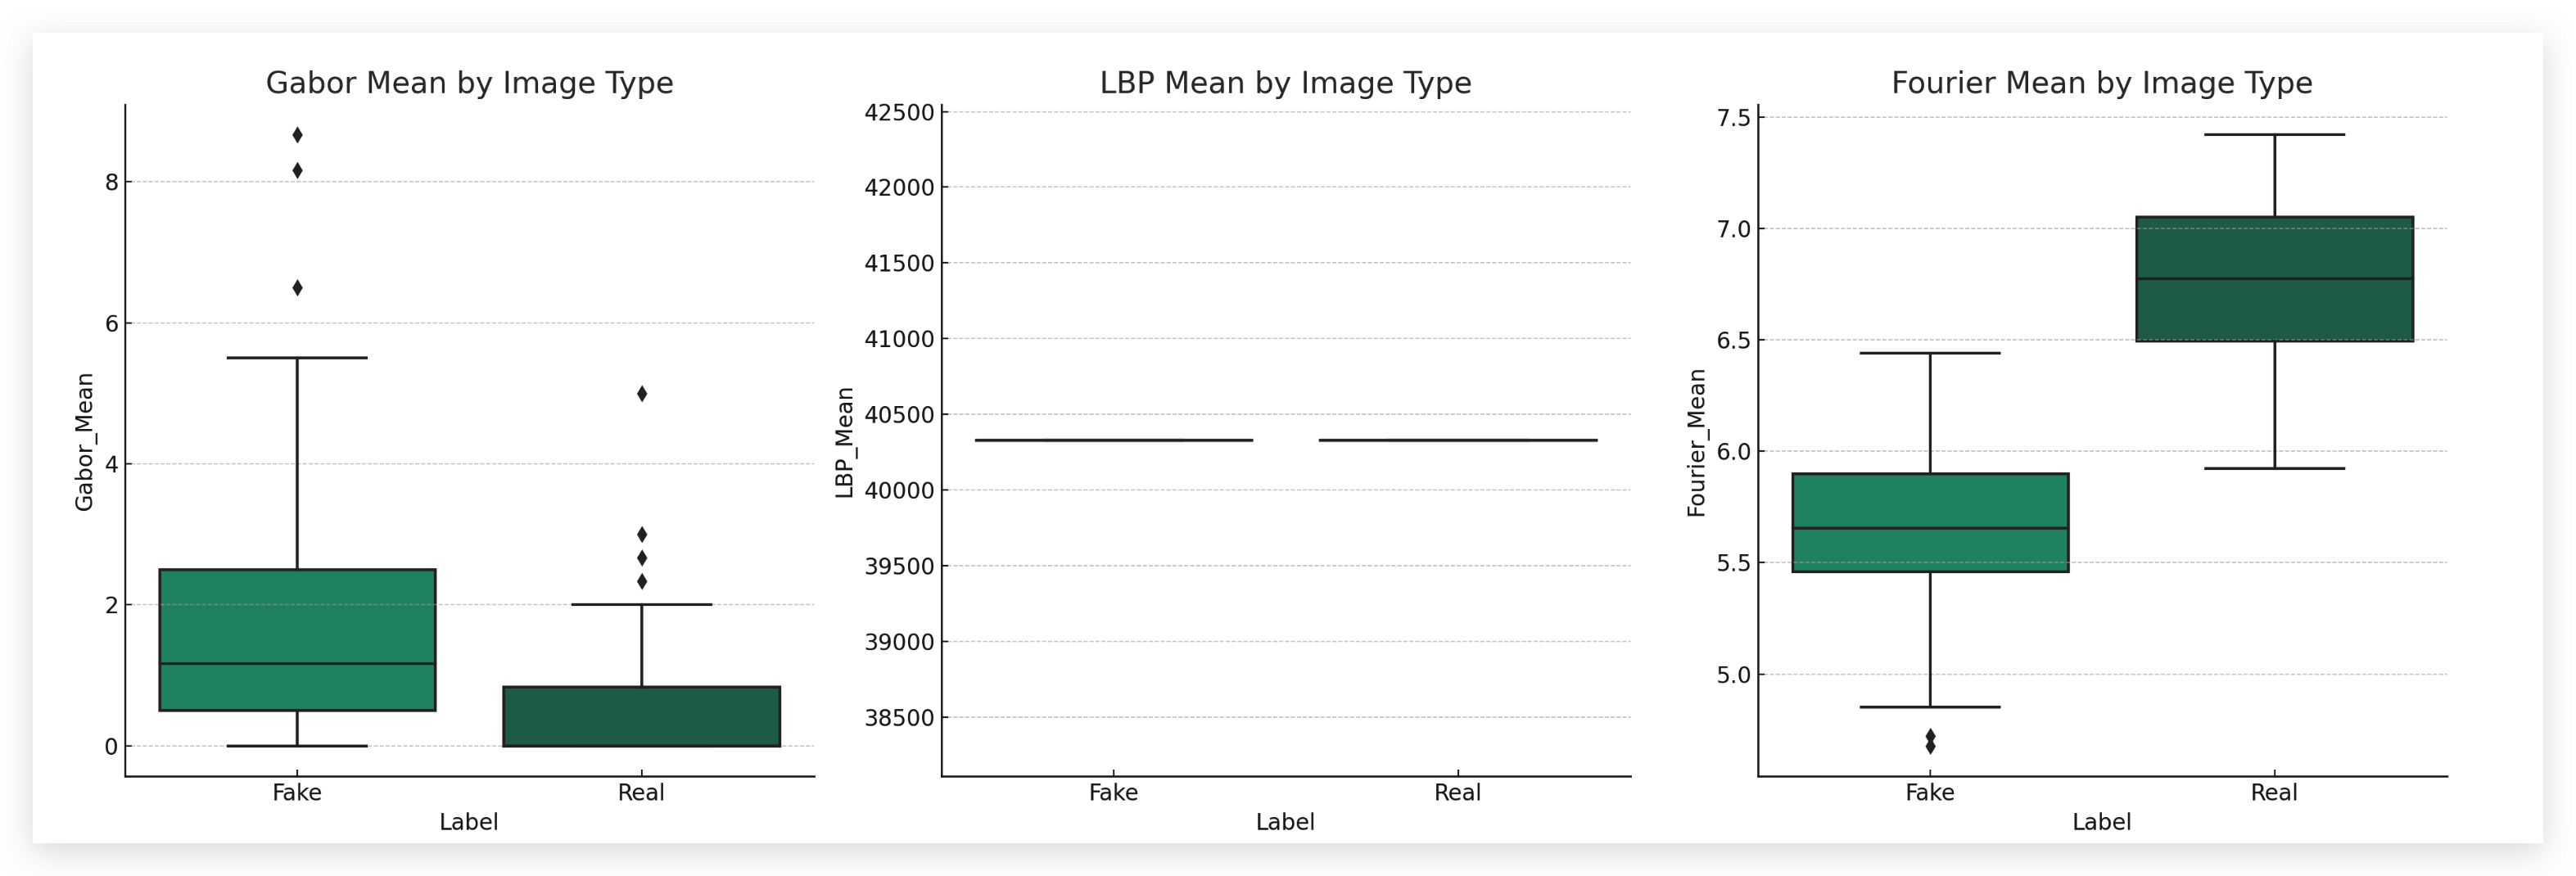

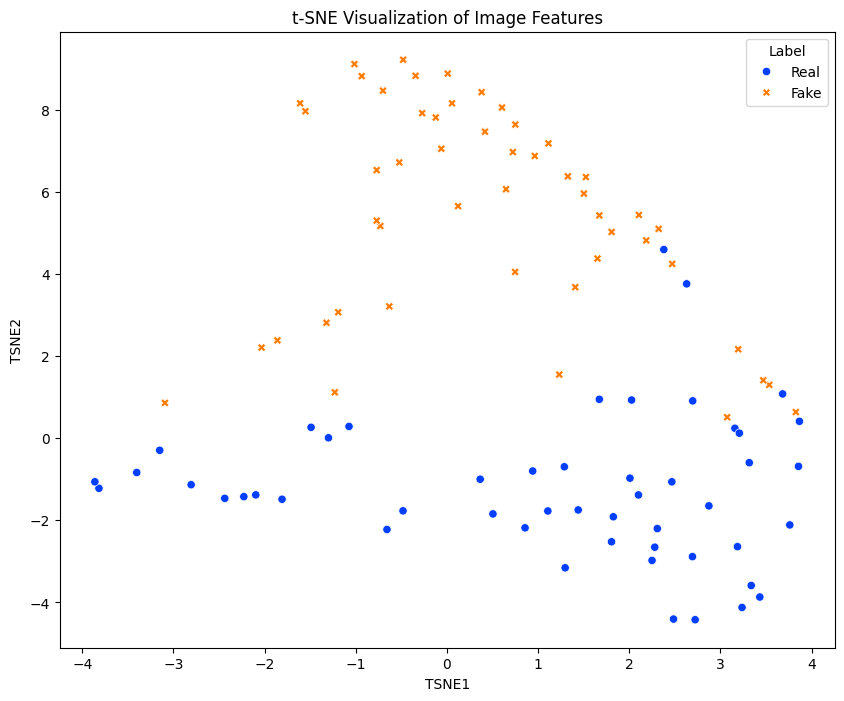

In [52]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Selecting the numerical features for t-SNE
features = features_df[['Gabor_Mean', 'LBP_Mean', 'Fourier_Mean']]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features.dropna())

# Applying t-SNE to reduce dimensionality to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_scaled)

# Creating a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

# Since we dropped NaN values, we need to ensure the label alignment
tsne_df['Label'] = features_df.dropna(subset=['Gabor_Mean', 'LBP_Mean', 'Fourier_Mean'])['Label'].values

# Visualizing the t-SNE embeddings
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Label', style='Label', data=tsne_df, palette='bright')
plt.title('t-SNE Visualization of Image Features')
plt.show()


In [53]:
tsne_df

TSNE1     TSNE2 Label
0   3.338471 -3.587644  Real
1   2.874209 -1.646623  Real
2   2.101357 -1.379982  Real
3   1.672261  0.950809  Real
4  -3.816921 -1.217652  Real
..       ...       ...   ...
95  0.604919  8.063576  Fake
96  3.074855  0.514749  Fake
97  1.672128  5.433747  Fake
98  1.503089  5.965186  Fake
99 -1.321156  2.816474  Fake

[100 rows x 3 columns]

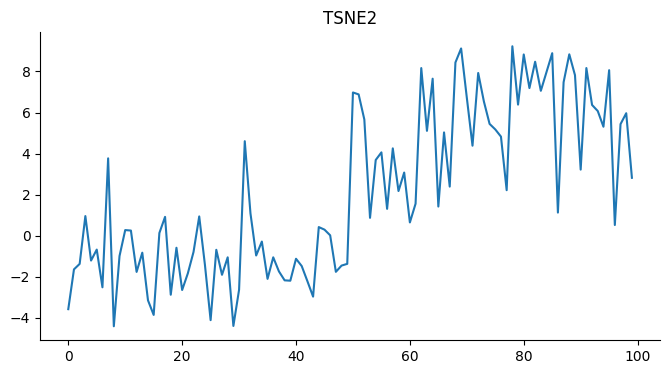

In [54]:
from matplotlib import pyplot as plt
tsne_df['TSNE2'].plot(kind='line', figsize=(8, 4), title='TSNE2')
plt.gca().spines[['top', 'right']].set_visible(False)

# Conclusion and Feature Selection

The t-SNE visualization presents a scatter plot of the high-dimensional image features reduced to two dimensions, color-coded by 'Real' and 'Fake' labels. Clusters of blue dots represent 'Fake' images, while orange crosses represent 'Real' images. The plot reveals some degree of separation between the two categories, indicating that the features contain information that could potentially distinguish between 'Real' and 'Fake' images. However, there's overlap between the clusters, suggesting that the features are not entirely discriminative or that t-SNE's non-linear mappings have limitations in fully unraveling the complex structure of the data for clear-cut separation.